In [2]:
#install.packages("RCurl")
library(RCurl)
library(tidyverse, warn.conflicts = FALSE)
library(lubridate, warn.conflicts = FALSE)
library(glue)

library(xml2)
library(rvest)
library(httr)
#install.packages("readxl")
library(readxl)
#install.packages("furrr")
library(furrr)
future::plan(multicore)

#install.packages("openxlsx")
library(openxlsx)

#install.packages('zoo')
library(zoo)


-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.4     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.0.1     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x tidyr::complete() masks RCurl::complete()
x dplyr::filter()   masks stats::filter()
x dplyr::lag()      masks stats::lag()


Attaching package: 'glue'


The following object is masked from 'package:dplyr':

    collapse



Attaching package: 'rvest'


The following object is masked from 'package:readr':

    guess_encoding


Loading required package: future


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




## Webscrape river flows
Matt

In [3]:
opuha_url <- "https://hydrowebportal.niwa.co.nz/Export/BulkExport?DateRange=Custom&StartTime=2015-01-01%2000%3A00&EndTime=2020-12-31%2000%3A00&TimeZone=12&Calendar=CALENDARYEAR&Interval=Monthly&Step=1&ExportFormat=csv&TimeAligned=True&RoundData=False&IncludeGradeCodes=False&IncludeApprovalLevels=False&IncludeInterpolationTypes=False&Datasets[0].DatasetName=Discharge%20Value.NRWQN%40TK3&Datasets[0].Calculation=Aggregate&Datasets[0].UnitId=140"
rakaia_url <- "https://hydrowebportal.niwa.co.nz/Export/BulkExport?DateRange=Custom&StartTime=2015-01-01%2000%3A00&EndTime=2020-12-31%2000%3A00&TimeZone=12&Calendar=CALENDARYEAR&Interval=Monthly&Step=1&ExportFormat=csv&TimeAligned=True&RoundData=False&IncludeGradeCodes=False&IncludeApprovalLevels=False&IncludeInterpolationTypes=False&Datasets[0].DatasetName=Discharge.Master%4068526&Datasets[0].Calculation=Instantaneous&Datasets[0].UnitId=140"
waitaki_url <- "https://hydrowebportal.niwa.co.nz/Export/BulkExport?DateRange=Custom&StartTime=2015-01-01%2000%3A00&EndTime=2020-12-31%2000%3A00&TimeZone=12&Calendar=CALENDARYEAR&Interval=PointsAsRecorded&Step=1&ExportFormat=csv&TimeAligned=True&RoundData=False&IncludeGradeCodes=False&IncludeApprovalLevels=False&IncludeInterpolationTypes=False&Datasets[0].DatasetName=Discharge%20Value.NRWQN%40TK6&Datasets[0].Calculation=Instantaneous&Datasets[0].UnitId=140"
kawarau_url <- "https://hydrowebportal.niwa.co.nz/Export/BulkExport?DateRange=Custom&StartTime=2015-01-01%2000%3A00&EndTime=2020-12-31%2000%3A00&TimeZone=12&Calendar=CALENDARYEAR&Interval=PointsAsRecorded&Step=1&ExportFormat=csv&TimeAligned=True&RoundData=False&IncludeGradeCodes=False&IncludeApprovalLevels=False&IncludeInterpolationTypes=False&Datasets[0].DatasetName=Discharge%20Value.NRWQN%40AX2&Datasets[0].Calculation=Instantaneous&Datasets[0].UnitId=140"
clutha_url <- "https://hydrowebportal.niwa.co.nz/Export/BulkExport?DateRange=Custom&StartTime=2015-01-01%2000%3A00&EndTime=2020-12-31%2000%3A00&TimeZone=12&Calendar=CALENDARYEAR&Interval=Monthly&Step=1&ExportFormat=csv&TimeAligned=True&RoundData=False&IncludeGradeCodes=False&IncludeApprovalLevels=False&IncludeInterpolationTypes=False&Datasets[0].DatasetName=Discharge.Master%4075207&Datasets[0].Calculation=Instantaneous&Datasets[0].UnitId=140"
mataura_url <- "https://hydrowebportal.niwa.co.nz/Export/BulkExport?DateRange=Custom&StartTime=2015-01-01%2000%3A00&EndTime=2020-12-31%2000%3A00&TimeZone=12&Calendar=CALENDARYEAR&Interval=PointsAsRecorded&Step=1&ExportFormat=csv&TimeAligned=True&RoundData=False&IncludeGradeCodes=False&IncludeApprovalLevels=False&IncludeInterpolationTypes=False&Datasets[0].DatasetName=Discharge%20Value.NRWQN%40DN5&Datasets[0].Calculation=Instantaneous&Datasets[0].UnitId=140"

In [4]:
#Matt

row_calc1 <- function(tibble){
    n = as.integer(nrow(tibble))
    data <- tail(tibble, (n-4))
    names(data) <- c('Time','Value(m^3/s)')
    return(data)
}

row_calc2 <- function(tibble){
    n = as.integer(nrow(tibble))
    data <- tail(tibble, (n-4)) %>% select(-X) 
    names(data) <- c('Time','Value(m^3/s)')
    return(data)  
}
 
convert_to_date <- function(tibble) {
    converted <- separate(tibble, Time, c("date", "time"), " ")  %>% mutate(date = as.Date(date))
    return(converted)
}
opuha <- opuha_url %>% read.csv() %>% as_tibble() %>% row_calc2() %>% convert_to_date()
"Opuha checkpoint"

rakaia <- rakaia_url %>% read.csv() %>% as_tibble() %>% row_calc2() %>% convert_to_date()
rakaia_name <- rep("rakaia", times=nrow(rakaia))
rakaia_station <- rep("highbank", times=nrow(rakaia))
rakaia$river <- rakaia_name
rakaia$Gen_Code <- rakaia_station
"Rakaia checkpoint"

waitaki <- waitaki_url %>% read.csv() %>% as_tibble() %>% row_calc1() %>% convert_to_date()
waitaki_name <- rep("waitaki", times=nrow(waitaki))
waitaki_station <- rep("waitaki", times=nrow(waitaki))
waitaki$river <- waitaki_name
waitaki$Gen_Code <- waitaki_station
"Waitaki checkpoint"

kawarau <- kawarau_url %>% read.csv() %>% as_tibble() %>% row_calc1() %>% convert_to_date()                                  
"Kawarau checkpoint"

clutha <- clutha_url %>% read.csv() %>% as_tibble() %>% row_calc2() %>% convert_to_date()   
clutha_name <- rep("clutha", times=nrow(clutha))
clutha_station <- rep("clyde", times=nrow(clutha))
clutha$river <- clutha_name
clutha$Gen_Code <- clutha_station
"Clutha checkpoint"

mataura <- mataura_url %>% read.csv() %>% as_tibble() %>% row_calc1() %>% convert_to_date()
"Mataura checkpoint"
#empty data sets, monowai <- read.csv(text = getURL("https://hydrowebportal.niwa.co.nz/Export/BulkExport?DateRange=Custom&StartTime=2020-01-01%2000%3A00&EndTime=2020-12-31%2000%3A00&TimeZone=12&Calendar=CALENDARYEAR&Interval=PointsAsRecorded&Step=1&ExportFormat=csv&TimeAligned=True&RoundData=False&IncludeGradeCodes=False&IncludeApprovalLevels=False&IncludeInterpolationTypes=False&Datasets[0].DatasetName=Discharge%20Value.NRWQN%40DN10&Datasets[0].Calculation=Instantaneous&Datasets[0].UnitId=140"))                    
#taieri <- read.csv(text = getURL("https://hydrowebportal.niwa.co.nz/Export/BulkExport?DateRange=Custom&StartTime=2020-01-01%2000%3A00&EndTime=2020-12-31%2000%3A00&TimeZone=12&Calendar=CALENDARYEAR&Interval=PointsAsRecorded&Step=1&ExportFormat=csv&TimeAligned=True&RoundData=False&IncludeGradeCodes=False&IncludeApprovalLevels=False&IncludeInterpolationTypes=False&Datasets[0].DatasetName=Discharge%20Value.NRWQN%40DN3&Datasets[0].Calculation=Instantaneous&Datasets[0].UnitId=140"))

## Concatenating all relevant rivers
river_data_raw <- bind_rows(rakaia, waitaki, clutha) %>% 
                rename(cumecs="Value(m^3/s)") %>% 
                mutate(cumecs=as.double(cumecs))
river_data_raw

[1] "Opuha checkpoint"

[1] "Rakaia checkpoint"

[1] "Waitaki checkpoint"

[1] "Kawarau checkpoint"

[1] "Clutha checkpoint"

[1] "Mataura checkpoint"

date,time,cumecs,river,Gen_Code
<date>,<chr>,<dbl>,<chr>,<chr>
2015-01-01,00:00:00,145.56822,rakaia,highbank
2015-02-01,00:00:00,114.97612,rakaia,highbank
2015-03-01,00:00:00,98.51507,rakaia,highbank
2015-04-01,00:00:00,260.14434,rakaia,highbank
2015-05-01,00:00:00,139.35321,rakaia,highbank
2015-06-01,00:00:00,158.66876,rakaia,highbank
2015-07-01,00:00:00,141.94014,rakaia,highbank
2015-08-01,00:00:00,148.16512,rakaia,highbank
2015-09-01,00:00:00,128.41403,rakaia,highbank


## Webscrape hydro stations power output
Jensen

### Information variables

In [3]:
# Main site address
main_url <- "https://www.emi.ea.govt.nz"
# Sub address for electricity generation information
power_url <- "/Wholesale/Datasets/Generation/Generation_MD"
# Sub address for hydrostations fleet
stations_url <- "/Wholesale/Datasets/Generation/Generation_fleet/Existing"
# Sub address for network supply points
points_url <- "/Wholesale/Reports/R_NSPL_DR?_si=v|3"

### Retrieve generation output data

In [ ]:
# Acquire html code from sub address
source <- paste(main_url, power_url, sep="") %>% read_html()
"Source checkpoint"
# Identify all links in the given html class
all_links <- source %>% html_nodes(".table") %>% html_elements("a") %>% html_attr("href")
"Links identification checkpoint"
# Identify appropriate urls within links and remove duplicates
filtered_links <- all_links[startsWith(all_links, power_url) & !duplicated(all_links)]
"Links filtered checkpoint"
# Extract date information from filtered links
start_pos <- nchar(power_url) + 2
dates <- substring(filtered_links , start_pos, start_pos + 3) 
"Date extraction checkpoint"
# Set dates wanted
dates_wanted <- seq(from=2015,to=2020)
# Select links containing csv data
selected_links <- filtered_links[dates %in% dates_wanted]
"Links selected checkpoint"
# Extract csv data into dataframes
link <- paste(main_url, selected_links, sep="") 
generation_md <- link %>% future_map_dfr(read_csv, show_col_types = FALSE)
"Generation retrieval checkpoint"

# Filter out non hydro stations
generation_md_hydro <- generation_md %>% filter(Tech_Code == "Hydro")
"Data filter checkpoint"
"RETRIEVAL COMPLETE"

[1] "Source checkpoint"

[1] "Links identification checkpoint"

[1] "Links filtered checkpoint"

[1] "Date extraction checkpoint"

[1] "Links selected checkpoint"

## Webscrape Electricity cost
Sujung

In [14]:
cost_url <- "https://www.mbie.govt.nz/assets/Data-Files/Energy/nz-energy-quarterly-and-energy-in-nz/qsdep-report-15-nov-2020.xlsx"

In [19]:
#url <- "https://www.mbie.govt.nz/assets/Data-Files/Energy/nz-energy-quarterly-and-energy-in-nz/qsdep-report-15-nov-2020.xlsx"
#output <- GET(url, write_disk(electricity_cost <- tempfile(fileext = ".xlsx")))
electricity_cost <- read.xlsx(cost_url, sheet = 3)
"spreadsheet retrieved"

[1] "spreadsheet retrieved"

In [20]:
electricity_cost_2020 <- electricity_cost[(1:43),-(2:45)] # Select necessary data (from 2015 to 2020)

#install.packages("janitor")
#library(janitor)
#excel_numeric_to_date(c(42050:44150))
date <- (as.Date(c(42050, 42139, 42231, 42323, 42415, 42505, 42597, 42689, 42781, 42870, 42962, 43054, 43146, 43235,
                 43327, 43419, 43511, 43600, 43692, 43784, 43876, 43966, 44058, 44150), origin="1899-12-30", '%Y-%m-%d'))

electricity_cost_2020_1 <- setNames(electricity_cost_2020, date)
electricity_cost_2020_1_copy <- electricity_cost_2020_1
names(electricity_cost_2020_1_copy)[2:(ncol(electricity_cost_2020_1))] <- names(electricity_cost_2020_1)[1:ncol(electricity_cost_2020_1)-1]
electricity_cost_wide <- electricity_cost_2020_1_copy %>% rename(Place="2015-02-15")
electricity_cost_wide

,Place,2015-02-15,2015-05-15,2015-08-15,2015-11-15,2016-02-15,2016-05-15,2016-08-15,2016-11-15,2017-02-15,...,2018-08-15,2018-11-15,2019-02-15,2019-05-15,2019-08-15,2019-11-15,2020-02-15,2020-05-15,2020-08-15,2020-11-15
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,New Zealand,28.18677,28.23048,28.31919,28.38523,28.37528,28.79836,28.94773,29.02200,29.00355,...,29.67185,29.74975,30.06926,30.11427,30.15747,30.69322,30.84218,30.68013,30.62976,30.51942
2,Timaru,25.75266,25.94597,25.79636,25.80533,25.79572,26.78539,27.61556,27.76247,27.87114,...,29.63009,30.07837,30.40747,31.61548,31.58571,32.19040,32.25982,31.11971,31.10866,31.10690
3,Cromwell,31.61079,31.35309,31.29330,31.16893,31.09872,31.27592,31.73074,31.93961,32.06997,...,32.17730,32.00023,32.25199,32.45564,32.38334,33.01527,33.18035,33.20534,33.17373,32.40289
4,Dunedin,24.03430,24.15720,24.31303,24.40475,24.40141,25.00323,24.95325,25.10718,24.91248,...,25.35278,25.15504,25.63392,25.68951,25.60729,26.01579,26.32894,26.73949,26.74610,26.17165
5,Queenstown,28.01881,27.74481,27.68368,27.58261,27.55979,27.68370,27.76627,27.94620,28.08325,...,28.23515,28.13474,28.41928,28.50389,28.48594,29.00970,29.11758,29.16189,29.13184,28.26935
6,Westport,36.34455,36.35278,36.29371,36.14250,36.01745,36.50123,37.17533,37.31007,37.48119,...,38.04932,37.97180,37.98625,38.05593,38.31247,38.64173,38.97055,39.62517,39.58696,39.53206
7,Waipukurau,31.29156,32.00428,32.66232,32.64384,32.69211,33.99319,34.31554,34.36612,34.54457,...,36.04301,36.04401,36.77011,36.90677,36.96736,37.51431,37.58320,38.07166,38.04405,38.03315
8,Pukekohe,28.37832,28.39763,28.48135,28.58057,28.58418,29.10747,29.44670,29.48764,29.48869,...,29.76259,29.74472,30.00184,30.18662,30.22856,30.67770,30.92560,31.37853,31.38638,31.19206
9,Gisborne,32.38614,32.29360,32.23180,32.25599,32.23236,33.23459,33.48748,33.49742,33.77286,...,34.54956,34.57022,34.79306,34.98527,34.80497,35.47923,35.72638,35.20392,35.20492,35.19541


### Identify south island cities and towns
Matt

In [6]:
url <- "https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_the_South_Island"
page_title = read_html(url)
output <- page_title %>% html_nodes(".div-col")%>% html_text()%>% str_split("\n")

In [7]:
list_towns <- list()
print(list_towns)
# print(output)
for(i in 1:19) {
  # i-th element of `u1` squared into `i`-th position of `usq`
list_towns <- list_towns %>% append(output[[i]][c(-1)])
}
len <- length(list_towns)
print(len)

list_towns[1:292]

list()
[1] 292


[[1]]
[1] "Akaroa"

[[2]]
[1] "Albert Town"

[[3]]
[1] "Albury"

[[4]]
[1] "Alexandra"

[[5]]
[1] "Amberley"

[[6]]
[1] "Anakiwa"

[[7]]
[1] "Appleby"

[[8]]
[1] "Arthur's Pass"

[[9]]
[1] "Arrowtown"

[[10]]
[1] "Ashburton"

[[11]]
[1] "Ashburton Forks"

[[12]]
[1] "Athol"

[[13]]
[1] "Aylesbury"

[[14]]
[1] "Balclutha"

[[15]]
[1] "Balfour"

[[16]]
[1] "Beaumont"

[[17]]
[1] "Belfast"

[[18]]
[1] "Birdling's Flat"

[[19]]
[1] "Blackball"

[[20]]
[1] "Blenheim"

[[21]]
[1] "Bluff"

[[22]]
[1] "Brighton"

[[23]]
[1] "Brightwater"

[[24]]
[1] "Bronte"

[[25]]
[1] "Browns"

[[26]]
[1] "Brunner"

[[27]]
[1] "Bulwer"

[[28]]
[1] "Burnham"

[[29]]
[1] "Cable Bay"

[[30]]
[1] "Canvastown"

[[31]]
[1] "Cashmere"

[[32]]
[1] "Cass"

[[33]]
[1] "Cave"

[[34]]
[1] "Charleston"

[[35]]
[1] "Cheviot"

[[36]]
[1] "Christchurch"

[[37]]
[1] "Clarence"

[[38]]
[1] "Clarksville"

[[39]]
[1] "Coalgate"

[[40]]
[1] "Colac Bay"

[[41]]
[1] "Collingwood"

[[42]]
[1] "Cromwell"

[[43]]
[1] "Crushington"

[[44]]
[1] "Culverden"

[[45]]
[1] "Dacre"

[[46]]
[1] "Darfield"

[[47]]
[1] "Denniston"

[[48]]
[1] "Diamond Harbour"

[[49]]
[1] "Dipton"

[[50]]
[1] "Dobson"

[[51]]
[1] "Dodson Valley"

[[52]]
[1] "Douglas"

[[53]]
[1] "Doyleston"

[[54]]
[1] "Drummond"

[[55]]
[1] "Dunedin"

[[56]]
[1] "Dunsandel"

[[57]]
[1] "Duntroon"

[[58]]
[1] "Ealing"

[[59]]
[1] "Edendale"

[[60]]
[1] "Eiffelton"

[[61]]
[1] "Eyreton"

[[62]]
[1] "Fairhall"

[[63]]
[1] "Fairlie"

[[64]]
[1] "Fortrose"

[[65]]
[1] "Frankton"

[[66]]
[1] "Franz Josef"

[[67]]
[1] "Geraldine"

[[68]]
[1] "Glenavy"

[[69]]
[1] "Glencoe"

[[70]]
[1] "Glenduan"

[[71]]
[1] "Glenorchy"

[[72]]
[1] "Glentunnel"

[[73]]
[1] "Gore"

[[74]]
[1] "Granity"

[[75]]
[1] "Greendale"

[[76]]
[1] "Greymouth"

[[77]]
[1] "Grove Bush"

[[78]]
[1] "Grovetown"

[[79]]
[1] "Haast"

[[80]]
[1] "Hakataramea"

[[81]]
[1] "Hampden"

[[82]]
[1] "Hanmer Springs"

[[83]]
[1] "Hardwicke"

[[84]]
[1] "Harihari"

[[85]]
[1] "Havelock"

[[86]]
[1] "Hawarden"

[[87]]
[1] "Hawea"

[[88]]
[1] "Hawksbury"

[[89]]
[1] "Hedgehope"

[[90]]
[1] "Henley"

[[91]]
[1] "Herbert"

[[92]]
[1] "Hinds"

[[93]]
[1] "Hira, New Zealand"

[[94]]
[1] "Hokitika"

[[95]]
[1] "Hope"

[[96]]
[1] "Hornby"

[[97]]
[1] "Hundalee"

[[98]]
[1] "Hyde"

[[99]]
[1] "Inangahua Junction"

[[100]]
[1] "Inchbonnie"

[[101]]
[1] "Invercargill"

[[102]]
[1] "Kaiapoi"

[[103]]
[1] "Kaikoura"

[[104]]
[1] "Kaitangata"

[[105]]
[1] "Kaiteriteri"

[[106]]
[1] "Kaka Point"

[[107]]
[1] "Kakanui"

[[108]]
[1] "Karamea"

[[109]]
[1] "Karitane"

[[110]]
[1] "Kennington"

[[111]]
[1] "Kingston"

[[112]]
[1] "Kirwee"

[[113]]
[1] "Koromiko"

[[114]]
[1] "Kumara"

[[115]]
[1] "Kurow"

[[116]]
[1] "Lake Tekapo"

[[117]]
[1] "Lawrence"

[[118]]
[1] "Leeston"

[[119]]
[1] "Leithfield"

[[120]]
[1] "Lincoln"

[[121]]
[1] "Linkwater"

[[122]]
[1] "Little River"

[[123]]
[1] "Longbeach, Canterbury"

[[124]]
[1] "Long Beach, Otago"

[[125]]
[1] "Longbush"

[[126]]
[1] "Lowcliffe"

[[127]]
[1] "Lumsden"

[[128]]
[1] "Lynnford"

[[129]]
[1] "Lyttelton"

[[130]]
[1] "Mabel Bush"

[[131]]
[1] "Macandrew Bay"

[[132]]
[1] "Maclennan"

[[133]]
[1] "Makarora"

[[134]]
[1] "Makarewa"

[[135]]
[1] "Manapouri"

[[136]]
[1] "Mapua"

[[137]]
[1] "Marahau"

[[138]]
[1] "Mataura"

[[139]]
[1] "Maungati"

[[140]]
[1] "Mayfield, Canterbury"

[[141]]
[1] "Mayfield, Marlborough"

[[142]]
[1] "Medbury"

[[143]]
[1] "Methven"

[[144]]
[1] "Middlemarch"

[[145]]
[1] "Milburn"

[[146]]
[1] "Millers Flat"

[[147]]
[1] "Milton"

[[148]]
[1] "Moenui"

[[149]]
[1] "Moeraki"

[[150]]
[1] "Momona"

[[151]]
[1] "Mosgiel"

[[152]]
[1] "Mossburn"

[[153]]
[1] "Motueka"

[[154]]
[1] "Mount Cook Village"

[[155]]
[1] "Mount Somers"

[[156]]
[1] "Murchison"

[[157]]
[1] "Myross Bush"

[[158]]
[1] "Naseby"

[[159]]
[1] "Nelson"

[[160]]
[1] "New Brighton"

[[161]]
[1] "Ngahere"

[[162]]
[1] "Ngakuta Bay"

[[163]]
[1] "Ngapara"

[[164]]
[1] "Ngatimoti"

[[165]]
[1] "Nightcaps"

[[166]]
[1] "Oamaru"

[[167]]
[

### Produce electricity cost data into a tidy format
Jensen

In [23]:
## Filter out towns and cities not in the south island.
electricity_cost_wide_filtered <- electricity_cost_wide %>% filter(Place %in% list_towns)
electricity_cost_tidy <- electricity_cost_wide_filtered %>% 
                            gather(year, cost, -c(Place)) %>%   
                            spread(Place, cost) %>%
                            mutate(year = as.Date(year))
electricity_cost_tidy

year,Ashburton,Balclutha,Christchurch,Cromwell,Dunedin,Greymouth,Invercargill,Kaiapoi,Nelson,Oamaru,Rangiora,Richmond,Timaru,Westport,Winton
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015-02-15,26.49519,38.88087,26.44894,31.61079,24.03430,33.07140,25.50256,25.82454,29.88088,25.42334,27.95767,27.00569,25.75266,36.34455,29.17111
2015-05-15,26.47694,38.92987,26.51883,31.35309,24.15720,33.09725,25.83934,26.00937,29.70124,25.60458,28.16753,26.81597,25.94597,36.35278,29.64563
2015-08-15,26.44140,38.88232,26.55521,31.29330,24.31303,33.16664,25.79006,26.03858,29.56135,25.59185,28.20081,26.81254,25.79636,36.29371,29.64336
2015-11-15,26.83552,39.09146,27.03113,31.16893,24.40475,33.07915,25.83706,26.23272,29.79704,25.95737,28.40979,26.87119,25.80533,36.14250,29.77018
2016-02-15,26.78588,38.89976,27.00975,31.09872,24.40141,33.05464,25.83238,26.23361,29.75327,25.92493,28.41365,26.87040,25.79572,36.01745,29.76643
2016-05-15,26.81387,39.38390,27.31289,31.27592,25.00323,33.29567,26.57605,26.24327,30.08909,26.31350,28.42278,27.03057,26.78539,36.50123,30.64573
2016-08-15,26.99418,39.90139,27.40152,31.73074,24.95325,33.74750,26.94333,27.15119,30.01814,26.32029,29.33615,27.45121,27.61556,37.17533,30.81270
2016-11-15,27.21859,39.98755,27.55725,31.93961,25.10718,33.79802,27.33465,27.35478,30.11192,26.72317,29.54449,27.54939,27.76247,37.31007,30.92515
2017-02-15,27.20529,40.11581,27.62556,32.06997,24.91248,33.91200,27.40530,27.34752,30.14016,26.80670,29.53596,27.56207,27.87114,37.48119,30.99839


## River flows and hydrostations power output combination

In [24]:
## Hydrostations -> rivers
# waitaki -> Waitaki
# highbank -> Rakaia
# clyde -> Clutha

# Save hydro station name relevant to rivers.
matching_gen_codes <- c("clyde", "highbank", "waitaki")

# Get the year and month data from date, for each row containing a date, and save into a dataframe.
year_month_station <- generation_md_hydro %>% select(Trading_date) %>% map_dfr(substring, 1, 7) %>% 
                                rename(year_month=Trading_date)

# Append the year and month dataframe into the main dataframe
generation_by_average <- generation_md_hydro %>% add_column(year_month_station)

# Store the column titles for each trading period (TP<num>)
TP_id <- sprintf("TP%d", 1:50)

# Store the columns titles for each mean of the trading period (TP_mean<num>)
TP_mean_id <- sprintf("TP%d_mean", 1:50)

# Calculate the mean in each month, for each trading period.
generation_by_average <- generation_by_average %>% 
                            group_by(Gen_Code, year_month) %>% 
                            summarise_each(list(mean=mean), TP_id)

# Append a new column to the data frame with this mean.
generation_by_average$average <- generation_by_average %>% subset(select = TP_mean_id) %>% rowMeans(na.rm = TRUE)

# Get the year and month data from date, for each row containing a date, and save into a dataframe.
year_month_river <- river_data_raw %>% select(date) %>% map_dfr(substring, 1, 7) %>% rename(year_month=date)

# Append the year and month dataframe into the main dataframe.
river_data <- river_data_raw %>% add_column(year_month_river)

# Remove hydro stations not on rivers identified, remove last two trading nodes due to mostly being 'NA',
#  and merge river_data dataframe with generation_by_average dataframe.
generation_by_river <- generation_by_average %>% filter(Gen_Code %in% matching_gen_codes) %>% 
                            subset(select = -c(TP49_mean, TP50_mean)) %>%
                            merge(river_data, by=c("Gen_Code", "year_month"))
generation_by_river

Warning message:
"`summarise_each_()` was deprecated in dplyr 0.7.0.
Please use `across()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."
Note: Using an external vector in selections is ambiguous.
i Use `all_of(TP_id)` instead of `TP_id` to silence this message.
i See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



Gen_Code,year_month,TP1_mean,TP2_mean,TP3_mean,TP4_mean,TP5_mean,TP6_mean,TP7_mean,TP8_mean,...,TP44_mean,TP45_mean,TP46_mean,TP47_mean,TP48_mean,average,date,time,cumecs,river
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<chr>,<dbl>,<chr>
clyde,2015-01,81821.29,73652.258,60998.065,58410.000,56873.548,56708.065,56484.194,61137.097,...,121135.81,111976.13,104053.23,99254.52,88754.84,122705.59,2015-01-01,00:00:00,491.5415,clutha
clyde,2015-02,94902.50,89136.071,87826.429,85473.214,85221.071,84694.643,84755.714,82916.429,...,138027.14,125652.50,115502.14,105897.14,97461.07,132960.58,2015-02-01,00:00:00,519.5486,clutha
clyde,2015-03,55318.71,53014.742,43734.581,33747.710,33562.387,33267.323,33428.806,33498.581,...,93028.00,79871.26,65461.29,61741.81,58140.81,94212.07,2015-03-01,00:00:00,349.7788,clutha
clyde,2015-04,51756.20,33704.900,21445.667,13378.233,12565.367,11399.500,11657.033,11678.800,...,85784.57,75690.07,71069.67,66469.80,61969.47,90746.94,2015-04-01,00:00:00,741.6083,clutha
clyde,2015-05,154906.48,142811.290,126620.871,114111.516,111650.839,111137.484,109573.774,109106.613,...,167424.87,167759.35,163077.39,163495.71,160097.55,156261.51,2015-05-01,00:00:00,668.5790,clutha
clyde,2015-06,146098.70,126624.167,111137.700,97823.000,90409.467,88807.567,90403.900,88798.267,...,173579.13,170076.87,164341.57,161765.77,157518.93,155923.54,2015-06-01,00:00:00,860.7566,clutha
clyde,2015-07,110625.71,104761.419,93682.161,84719.806,80587.548,78877.323,77953.903,77669.516,...,151556.39,139154.42,127937.13,122102.35,115752.03,143275.22,2015-07-01,00:00:00,694.8239,clutha
clyde,2015-08,97515.39,82806.452,69095.935,52532.355,50849.226,49196.065,48987.258,48983.968,...,121812.90,114443.74,109234.48,104811.23,102938.42,125903.52,2015-08-01,00:00:00,641.3159,clutha
clyde,2015-09,51845.80,26623.633,16018.033,3984.033,3517.533,1854.400,1753.067,7581.700,...,97510.43,91807.73,77261.27,NA,NA,97250.76,2015-09-01,00:00:00,411.7504,clutha


`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



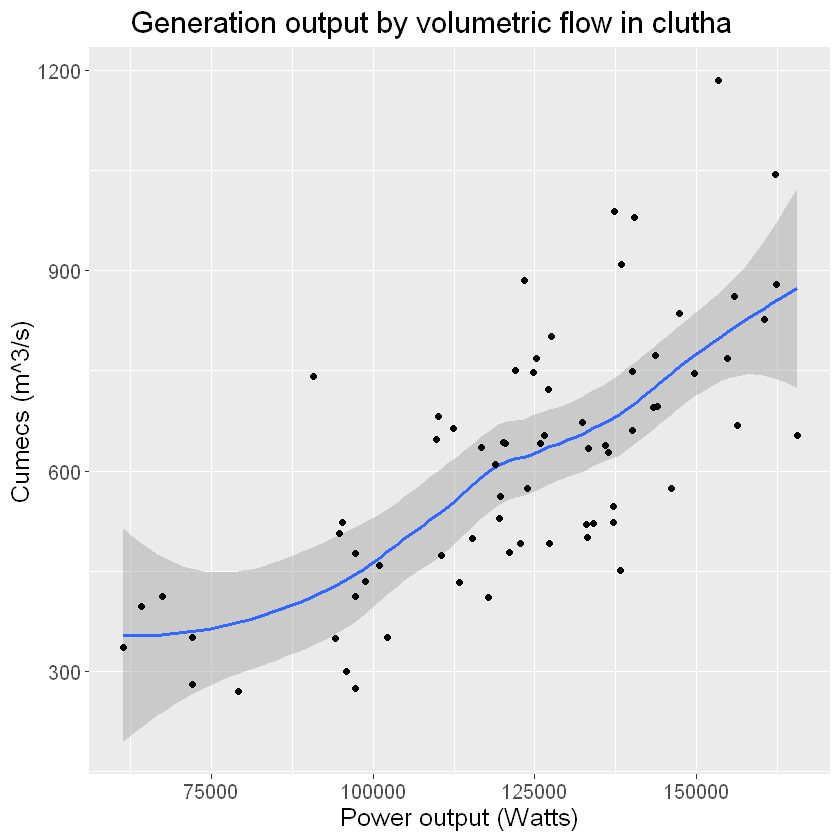

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



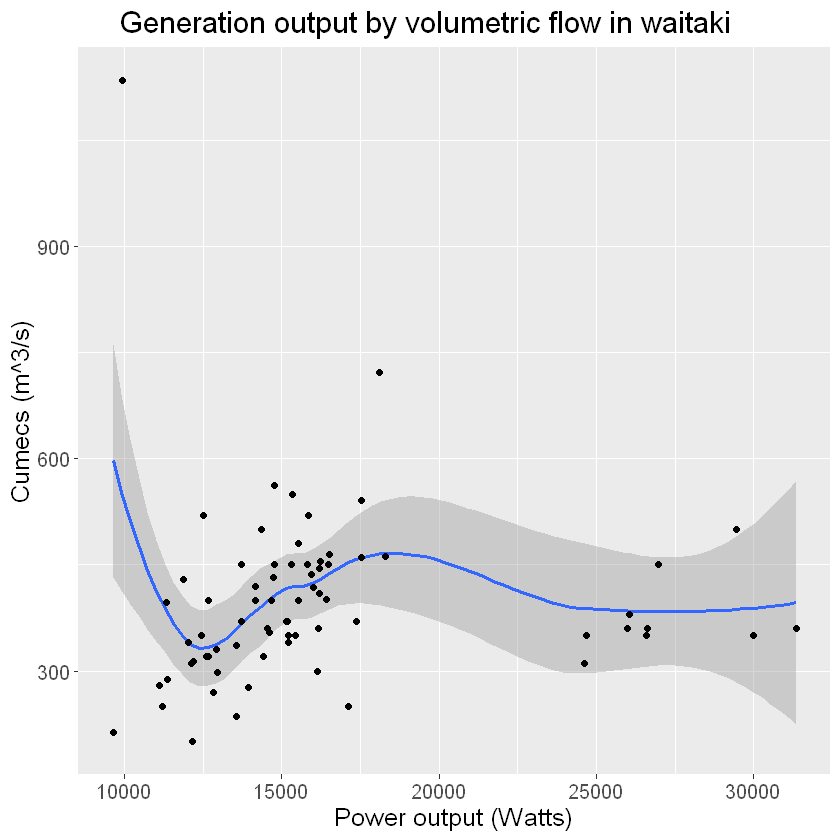

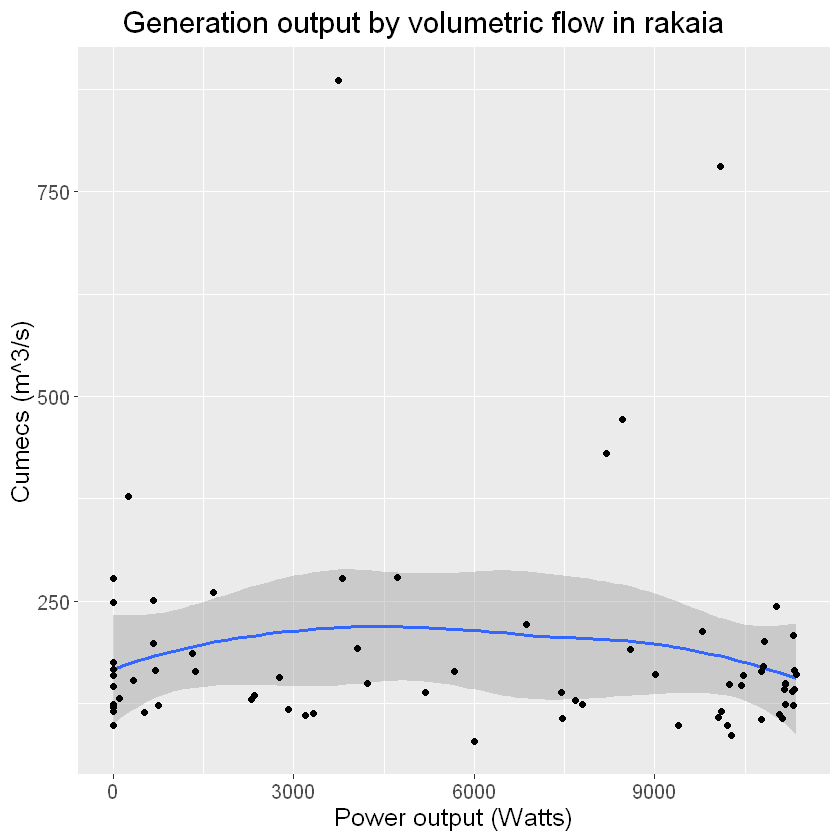

In [25]:
plot_river_generation <- function(data, river_name) {
    graph_title <- paste("Generation output by volumetric flow in", river_name)
    plot <- data %>% filter(river == river_name) %>% ggplot(mapping = aes(x = average, y = cumecs)) + 
                                                        labs(title = graph_title) +
                                                         theme(text = element_text(size=15),
                                                              plot.title = element_text(hjust=0.3)) + 
                                                        scale_x_continuous(name = "Power output (Watts)") +
                                                        scale_y_continuous(name = "Cumecs (m^3/s)") +
                                                        geom_smooth() +
                                                        geom_point()
    return(plot)
}
generation_by_river %>% plot_river_generation("clutha")
generation_by_river %>% plot_river_generation("waitaki")
generation_by_river %>% plot_river_generation("rakaia")

In [1]:
#electricity_cost_tidy
# Get the year and month data from date, for each row containing a date, and save into a dataframe.
year_month_station <- generation_md_hydro %>% select(Trading_date) %>% map_dfr(substring, 1, 7) %>% 
                                rename(year_month=Trading_date)

# Append the year and month dataframe into the main dataframe
generation_by_average <- generation_md_hydro %>% add_column(year_month_station)

# Store the column titles for each trading period (TP<num>)
TP_id <- sprintf("TP%d", 1:50)

# Store the columns titles for each mean of the trading period (TP_mean<num>)
TP_mean_id <- sprintf("TP%d_mean", 1:50)

# Calculate the mean in each month, for each trading period.
generation_by_average <- generation_by_average %>% 
                            group_by(Gen_Code, year_month) %>% 
                            summarise_each(list(mean=mean), TP_id)

# Append a new column to the data frame with this mean.
generation_by_average$average <- generation_by_average %>% subset(select = TP_mean_id) %>% rowMeans(na.rm = TRUE)
generation_by_average %>% select(Gen_Code, year_month, average) %>% mutate(month = substring(year_month, 6)) %>% mutate(year = substring(year_month, 0, 4)) #%>%  
    #mutate(quarter = case_when(year = year & month >= 12 & mnth <= 02 ~ 'Q1', year = year & mnth >= 03 & mnth <= 05 ~ 'Q2', year = year & mnth >= 06 & mnth <= 08 ~ 'Q3', year = year & mnth >= 09 & mnth <= 11 ~ 'Q4' ))

ERROR: Error in generation_md_hydro %>% select(Trading_date) %>% map_dfr(substring, : could not find function "%>%"
